In [4]:

import pandas as pd
import requests as req
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

beachID = '1'

resp = req.get('https://beachbackend.herokuapp.com/historical/{}'.format(beachID)) 

data = resp.json()





{'_id': '621784a096f2399dfa3a002f', 'beachReadings': {'1': {'beachId': 1, 'beachName': 'Marie Curtis Park East Beach', 'eColi': 120, 'advisory': "E.coli levels exceed the City of Toronto's  established beach water quality standard of 100 E.coli per 100ml of water.", 'statusFlag': 'UNSAFE', 'collectionDate': '2021-08-27', 'position': {'latidude': 43.585563, 'longitude': -79.540732}, 'provider': 'City of Toronto', 'providerId': 1}}, 'weather': {'date': 'Fri, 27 Aug 2021 04:00:00 GMT', 'station': {'name': 'TORONTO INTL A', 'latitude': 43.68, 'longitude': -79.63, 'province': 'ONTARIO', 'climate_identifier': '6158731'}, 'meanTemp': 23.4, 'minTemp': 20.1, 'maxTemp': 26.6, 'totalRain': 0, 'speedOfMaxGust': 39, 'dirOfMaxGust': '10s Deg', 'totalPrecipitation': 0}}


/var/folders/fd/26vvffln4yb14vfkx_2p2fsh0000gn/T/ipykernel_33819/1136197922.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normDf=(df2-df2.mean())/df2.std()


<AxesSubplot:xlabel='date'>

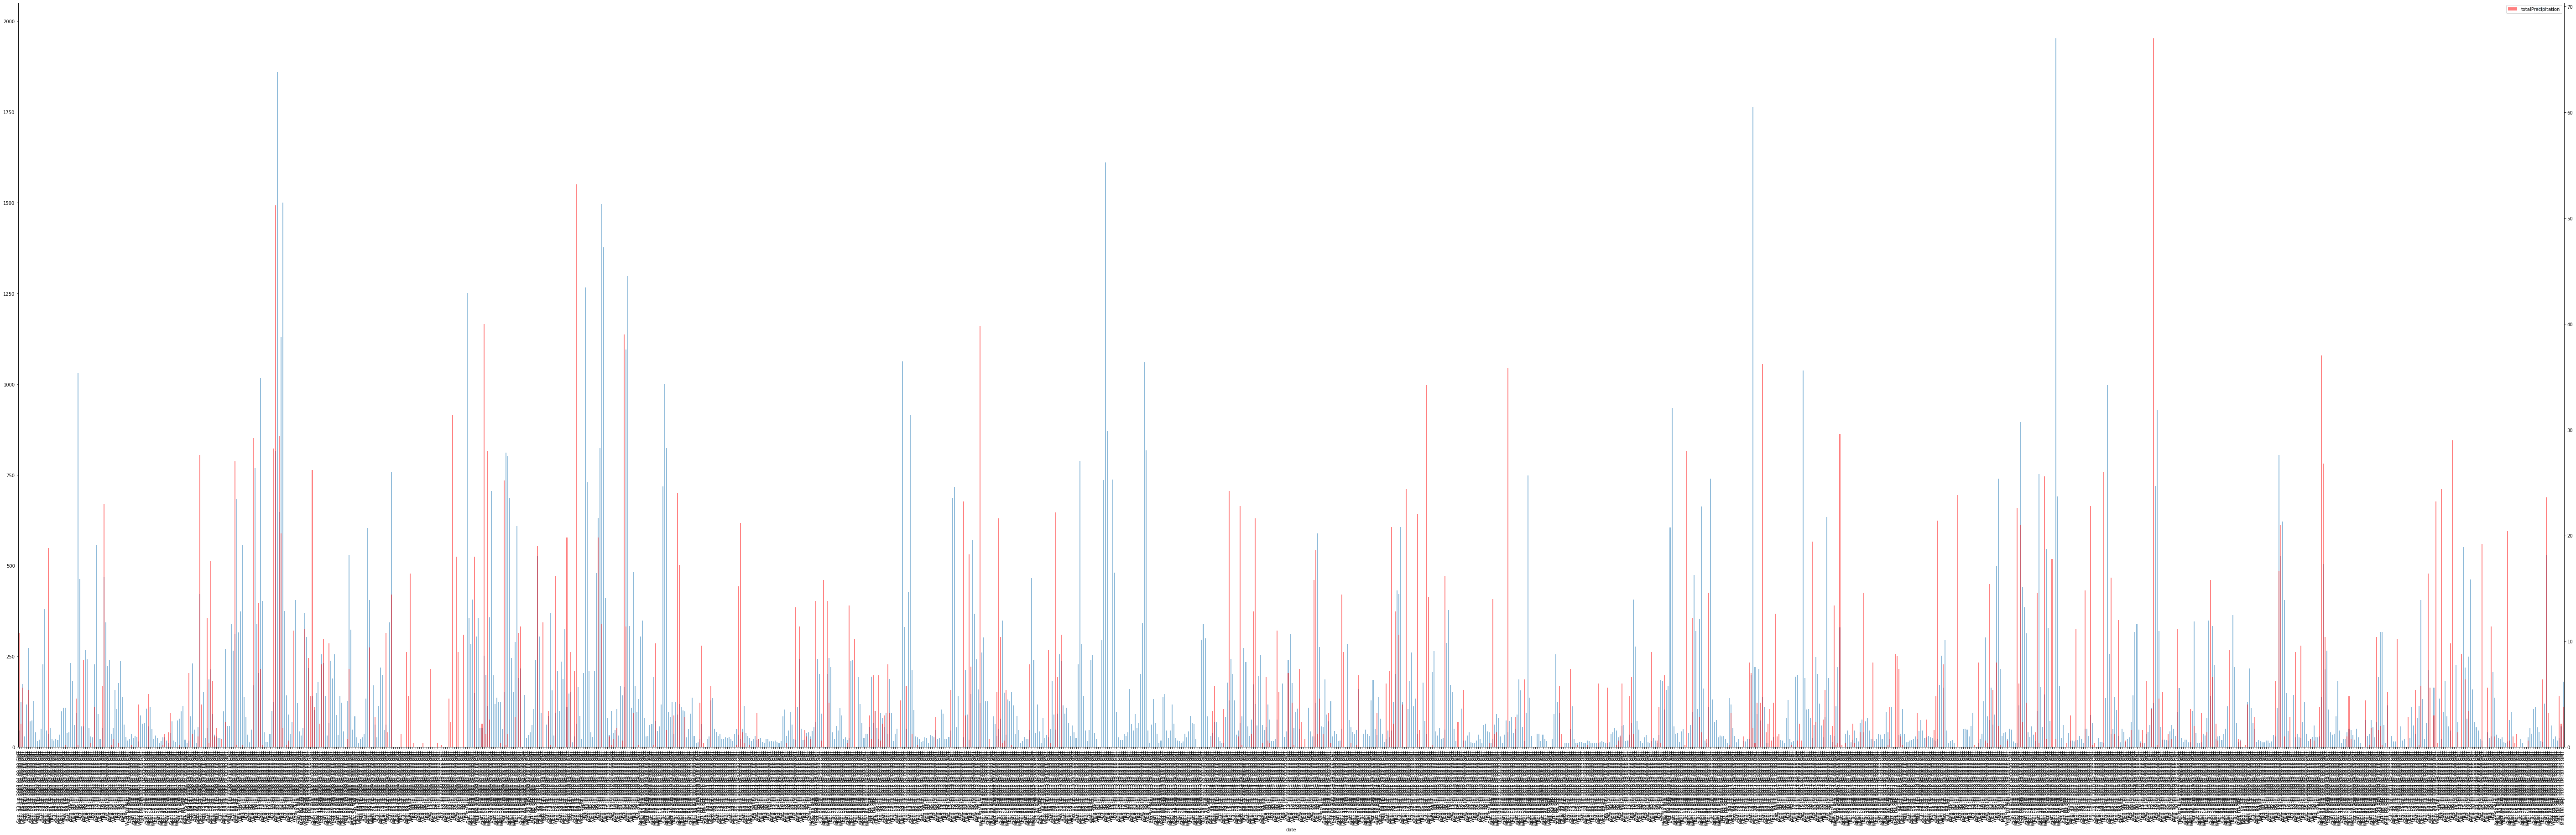

In [2]:

formattedData = []
print(data[10])
import matplotlib.pyplot as plt


for index, item in enumerate(data): 
  formattedData.append({
    '_id': item['_id'],
    'date': item['weather']['date'],
    'ecoli': item['beachReadings'][beachID]["eColi"],
    'totalPrecipitation': item['weather']['totalPrecipitation'],
    "wind": item['weather']['speedOfMaxGust'],
  })

formattedData.reverse()

df2 = pd.DataFrame(data=formattedData, columns=['date', 'ecoli', 'totalPrecipitation', 'wind'])



normDf=(df2-df2.mean())/df2.std()


ax = df2.plot.bar(x='date', y='ecoli', figsize=(100,30), alpha=0.5) 
ax1 = ax.twinx()
df2.plot.bar(x='date', y='totalPrecipitation', ax=ax1, color='r', alpha=0.5)




                       ecoli  totalPrecipitation      wind
ecoli               1.000000            0.092155  0.023967
totalPrecipitation  0.092155            1.000000  0.240717
wind                0.023967            0.240717  1.000000


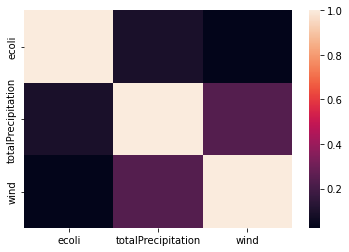

In [3]:

correlations = df2.corr()
print(correlations)

sns.heatmap(correlations)
plt.show()

# normDf=(df2-df2.mean())/df2.std()

# display(normDf)

# ax = df2.plot(x='totalPrecipitation', y='ecoli', figsize=(100,30), alpha=0.5) 
# ax1 = ax.twinx()
# df2.plot(x='date', y='totalPrecipitation', ax=ax1, color='r', alpha=0.5)

